In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_images(images, titles, rows, cols , info):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        # ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Intensity Transformation

## Log Transformation

In [5]:
def LogTransform(img):
    # Apply log transform.
    c = 255/(np.log(1 + np.max(img)))
    log_transformed = c * np.log(1 + img)
    # Specify the data type.
    log_transformed = np.array(log_transformed, dtype = np.uint8)
    return np.log(img)

C:\Users\AthimetA\AppData\Local\Temp\ipykernel_19516\3425439734.py:4: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
C:\Users\AthimetA\AppData\Local\Temp\ipykernel_19516\3425439734.py:7: RuntimeWarning: divide by zero encountered in log
  return np.log(img)


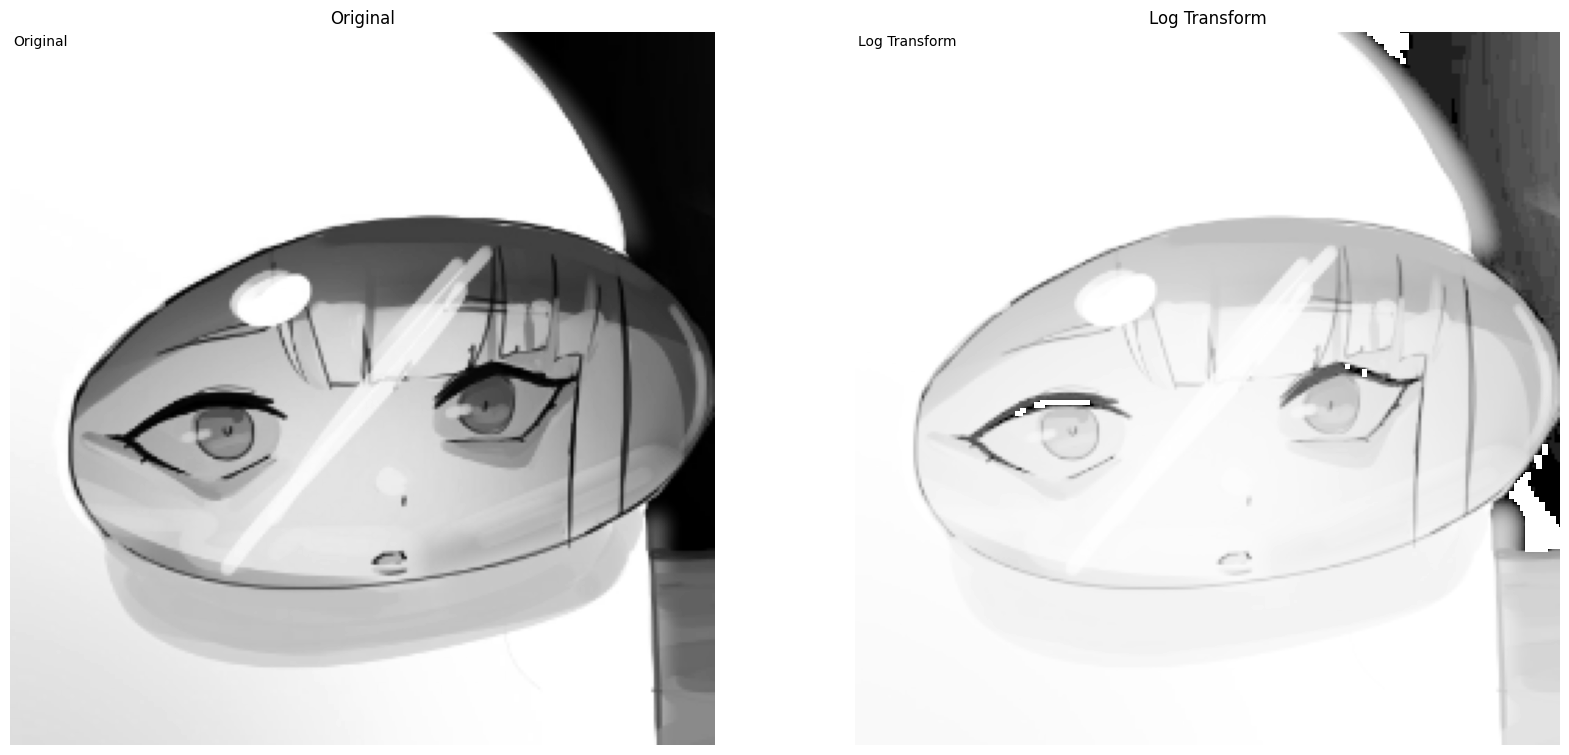

In [6]:
imglog = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
# imglog = cv2.cvtColor(imglog, cv2.COLOR_BGR2GRAY)
imglogt = LogTransform(imglog)

titles = ['Original', 'Log Transform']
images = [imglog, imglogt]
info = ['Original', 'Log Transform']
plot_images(images, titles, 1, 2, info)

## Power-Law Transformation

In [7]:
def GammaTransform(img, gamma):
    # Apply gamma transform.
    gamma_transformed = np.array(255*(img/255)**gamma, dtype = 'uint8')
    return gamma_transformed

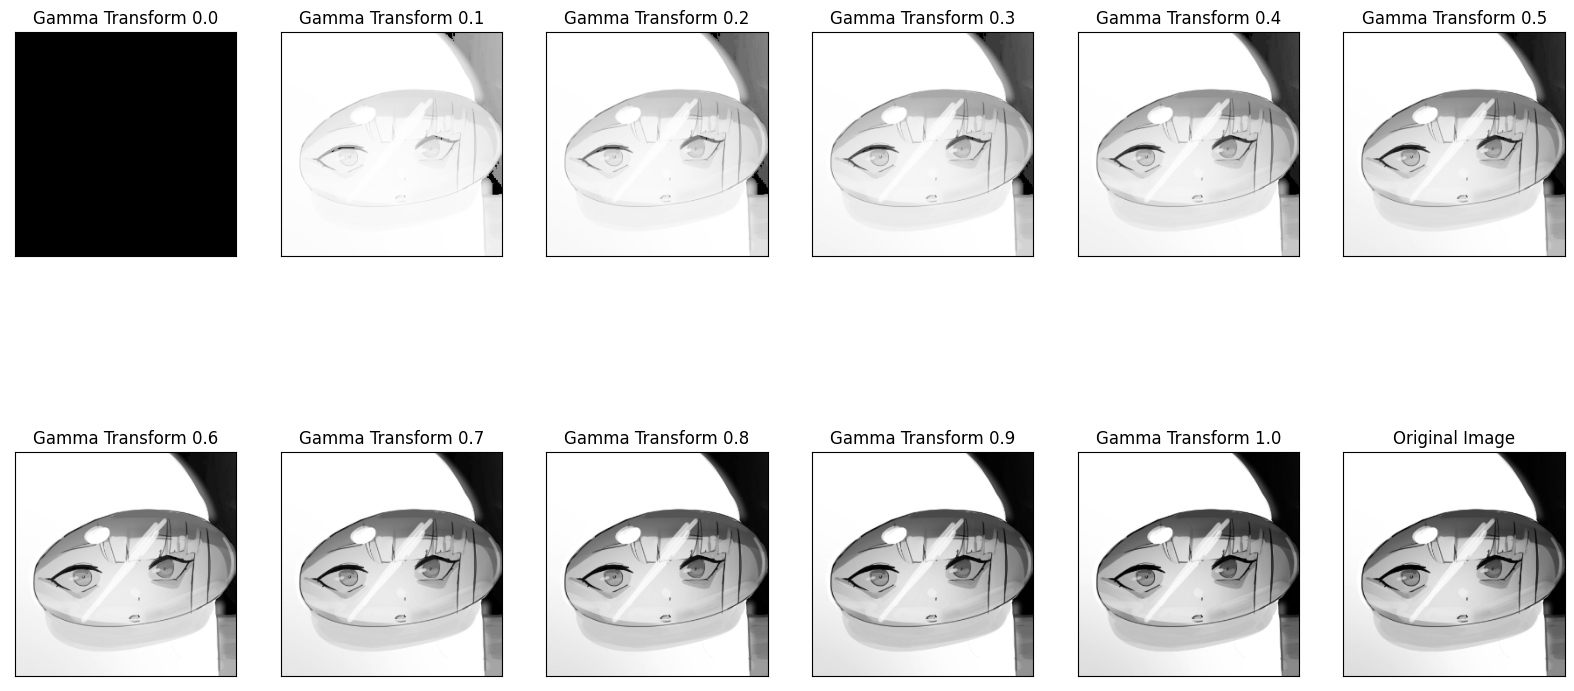

In [8]:
imggamma = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
gamma = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gammaplot = []
plt.figure(figsize=(20, 10))
for i in range(len(gamma)):
    gammaplot.append(GammaTransform(imggamma, gamma[i]))
    plt.subplot(2,6,i+1), plt.imshow(gammaplot[i], cmap = 'gray')
    plt.title('Gamma Transform '+str(gamma[i])), plt.xticks([]), plt.yticks([])
plt.subplot(2,6,12), plt.imshow(imggamma, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Piecewise-Linear Transformation Functions

## Contrast Stretching

<img src="../img/contrast_stretching.png" alt="contrast_stretching" width="500" height="600">

In [9]:
def PiecewiseLinearTransform(img, r1, s1, r2, s2):
    # Apply piecewise linear transform.
    # Equation 1
    # f(x) = (s1/r1)*x, 0<=x<=r1
    a = s1/r1
    b = 0
    # Equation 2
    # f(x) = ((s2-s1)/(r2-r1))*(x-r1) + s1, r1<=x<=r2
    c = (s2 - s1)/(r2 - r1)
    d = s1 - c*r1
    # Equation 3
    # f(x) = ((255-s2)/(255-r2))*(x-r2) + s2, r2<=x<=255
    e = (255 - s2)/(255 - r2)
    f = s2 - e*r2
    img = np.vectorize(lambda x: a*x + b if x <= r1 else c*x + d if x <= r2 else e*x + f)(img)
    piecewise_linear_transformed = np.array(img, dtype = np.uint8)
    return piecewise_linear_transformed

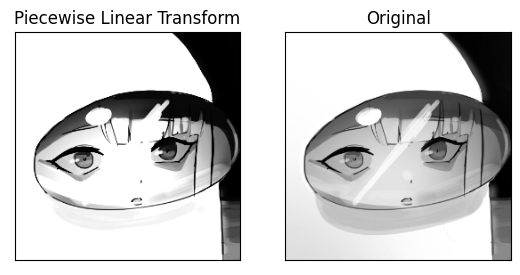

In [10]:
imgpiece = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
r1 = 70
s1 = 10
r2 = 200
s2 = 255
imgpiecet = PiecewiseLinearTransform(imgpiece, r1, s1, r2, s2)

plt.subplot(121), plt.imshow(imgpiecet, cmap = 'gray')
plt.title('Piecewise Linear Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgpiece, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

## Intensity Level slicing

In [11]:
def IntensitlLevelSlicing(img, r1, r2):
    # Apply intensity level slicing.
    img = np.vectorize(lambda x: 0 if x < r1 else 255 if x > r2 else x)(img)
    intensity_level_sliced = np.array(img, dtype = np.uint8)
    return intensity_level_sliced

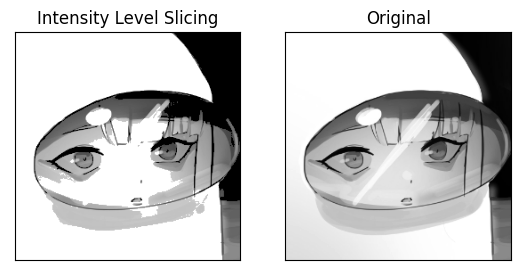

In [12]:
imginten = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
r1 = 70
r2 = 200
imgintent = IntensitlLevelSlicing(imginten, r1, r2)

plt.subplot(121), plt.imshow(imgintent, cmap = 'gray')
plt.title('Intensity Level Slicing'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imginten, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

## Bit Plane Slicing

In [13]:
def BitPlaneSlicing(img, n):
    # Apply bit plane slicing.
    bit_plane_sliced = np.array(img, dtype = np.uint8)
    # Shift the bits of the image to the right by n-1.
    bit_plane_sliced = np.vectorize(lambda x: x if (x & (1 << n)) else 0)(bit_plane_sliced)
    return bit_plane_sliced

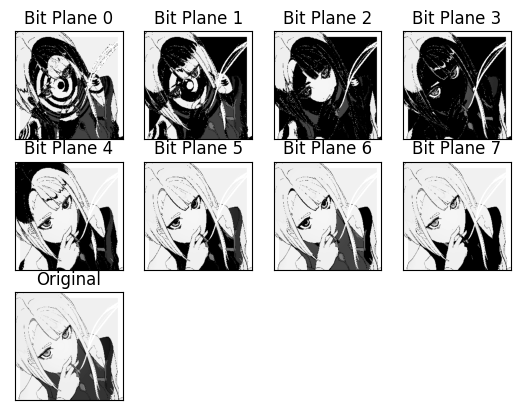

In [14]:
imgbit = cv2.imread('../img/lucy.jpg', cv2.IMREAD_GRAYSCALE)
imgbit = cv2.resize(imgbit, (256, 256), interpolation=cv2.INTER_LINEAR)
for i in range(8):
    imgbitn = BitPlaneSlicing(imgbit, i)
    plt.subplot(3,4,i+1), plt.imshow(imgbitn, cmap = 'gray')
    plt.title('Bit Plane '+str(i)), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,9), plt.imshow(imgbit, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# Histrogram Equalization

In [15]:
def HistEqualization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[img]
    return img2

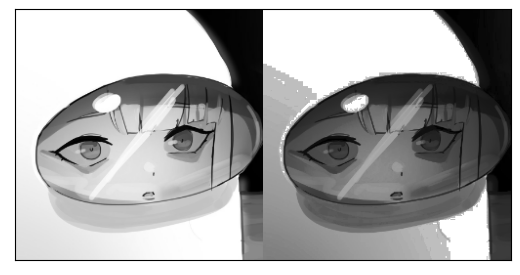

In [16]:
img = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
# creating a Histograms Equalization
# of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img)
  
# stacking images side-by-side
res = np.hstack((img, equ))

# plotting the images
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()


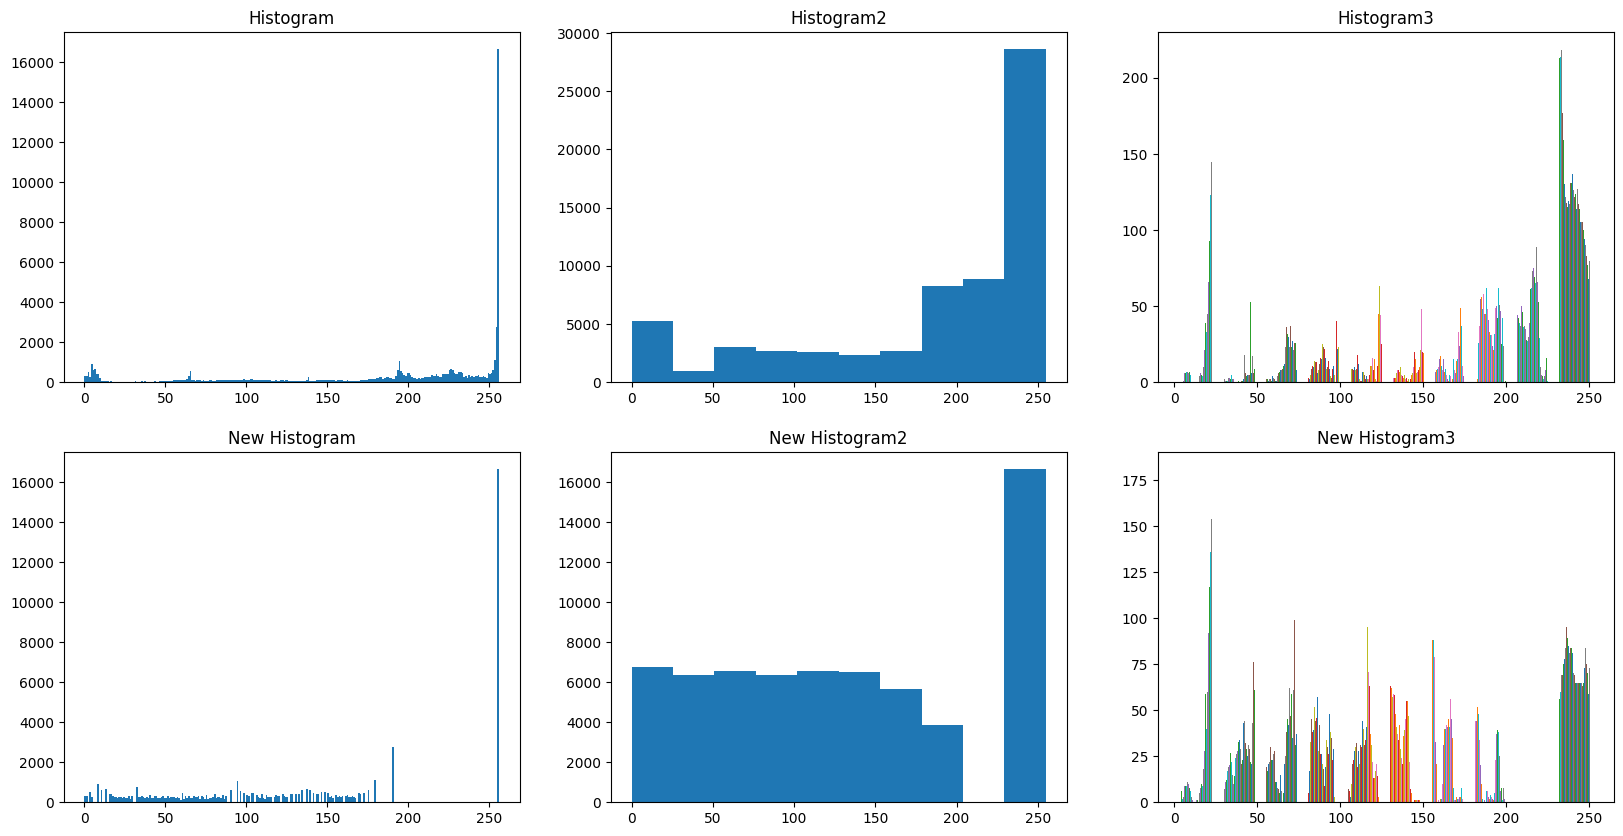

In [17]:
# plotting new histogram
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.subplot(2,3,2)
plt.hist(img.ravel())
plt.title('Histogram2')
plt.subplot(2,3,3)
plt.hist(img)
plt.title('Histogram3')
plt.subplot(2,3,4)
plt.hist(equ.ravel(), 256, [0, 256])
plt.title('New Histogram')
plt.subplot(2,3,5)
plt.hist(equ.ravel())
plt.title('New Histogram2')
plt.subplot(2,3,6)
plt.hist(equ)
plt.title('New Histogram3')
plt.show()

# Histogram Comparison

In [18]:
def HistogramComparison(img):
    bgr_planes = cv2.split(img)
    histSize = 256
    histRange = (0, 256) # the upper boundary is exclusive
    accumulate = False
    b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
    g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
    r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
    hist_w = 512
    hist_h = 400
    bin_w = int(round( hist_w/histSize ))
    histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
    cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    for i in range(1, histSize):
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(b_hist[i]) ),
                ( 255, 0, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(g_hist[i]) ),
                ( 0, 255, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(r_hist[i]) ),
                ( 0, 0, 255), thickness=2)
    return histImage

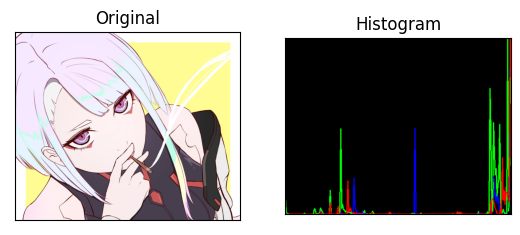

In [19]:

img = cv2.imread('../img/lucy.jpg', cv2.IMREAD_UNCHANGED)
histImage = HistogramComparison(img)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB))
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

# Histogram Matching

In [20]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [21]:
def HistogramMatching1(original, specified):

    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(oldshape)

In [22]:
def HistogramMatching2(imgSrc, imgTar):
    # imgSrc is the source image
    # imgTar is the target image
    # imgSrc and imgTar must be in the same color space
    # get the color histogram of the target image
    hist, bins = np.histogram(imgTar.flatten(), 256, [0, 256])
    # Calculate the cumulative distribution function (cdf) of the target image
    cdf = hist.cumsum()
    # Normalize the cdf of the target image to the range [0, 255]
    cdf_normalized = cdf * hist.max() / cdf.max()
    # Mask all pixels with value 0 and get the cdf of the target image
    cdf_m = np.ma.masked_equal(cdf, 0)
    # Calculate the mean of the non-zero pixels in the cdf of the target image
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Fill in the masked pixels with the mean value
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    # Output the cdf
    imgOut = cdf[imgSrc]
    return imgOut

In [23]:
from skimage import exposure

def HistogramMatching3(imgSrc, imgTar):
    # imgSrc is the source image
    # imgTar is the target image
    # imgSrc and imgTar must be in the same color space
    imgOut = exposure.match_histograms(imgSrc, imgTar, multichannel=True)
    return imgOut

C:\Users\AthimetA\AppData\Local\Temp\ipykernel_19516\3804275584.py:7: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  imgOut = exposure.match_histograms(imgSrc, imgTar, multichannel=True)


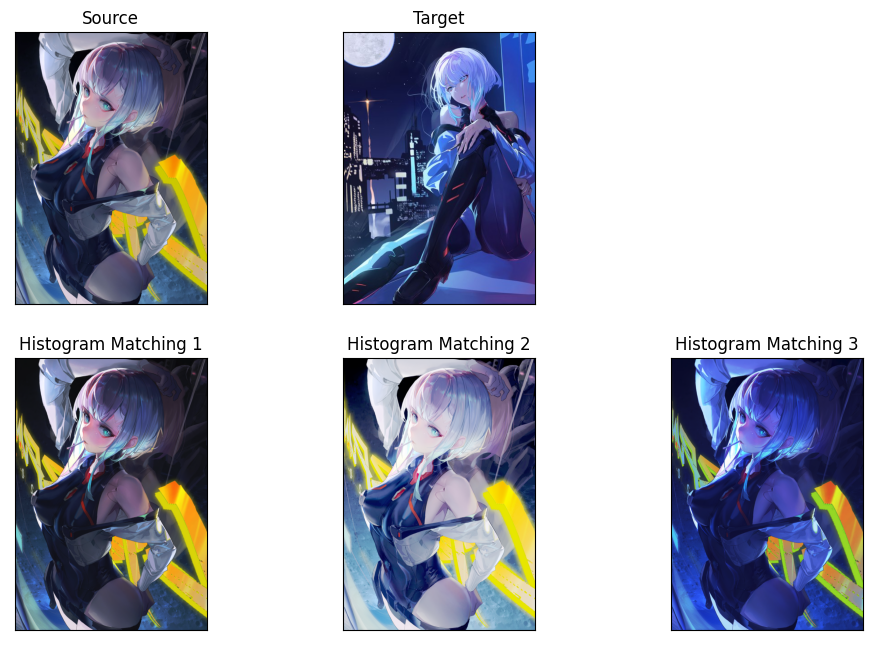

In [24]:
imgHmSrc = cv2.imread('../img/lucy6.jpg', cv2.IMREAD_UNCHANGED)
imgHmTar = cv2.imread('../img/lucy5.jpg', cv2.IMREAD_UNCHANGED)

imgHm1 = HistogramMatching1(imgHmSrc, imgHmTar)
imgHm2 = HistogramMatching2(imgHmSrc, imgHmTar)
imgHm3 = HistogramMatching3(imgHmSrc, imgHmTar)

plt.figure(figsize=(12, 12))
plt.subplot(3,3,1), plt.imshow(cv2.cvtColor(imgHmSrc, cv2.COLOR_BGR2RGB))
plt.title('Source'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2), plt.imshow(cv2.cvtColor(imgHmTar, cv2.COLOR_BGR2RGB))
plt.title('Target'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,4), plt.imshow(cv2.cvtColor(imgHm1, cv2.COLOR_BGR2RGB))
plt.title('Histogram Matching 1'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,5), plt.imshow(cv2.cvtColor(imgHm2, cv2.COLOR_BGR2RGB))
plt.title('Histogram Matching 2'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6), plt.imshow(cv2.cvtColor(imgHm3, cv2.COLOR_BGR2RGB))
plt.title('Histogram Matching 3'), plt.xticks([]), plt.yticks([])
plt.show()

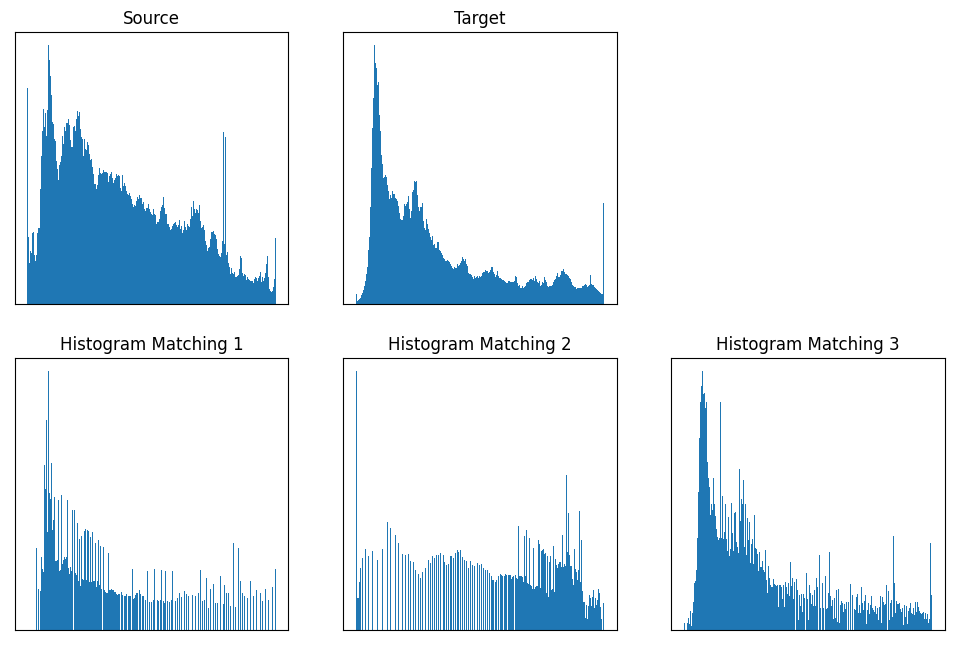

In [25]:
# Plotting the histogram
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1), plt.hist(imgHmSrc.ravel(), 256, [0, 256])
plt.title('Source'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2), plt.hist(imgHmTar.ravel(), 256, [0, 256])
plt.title('Target'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,4), plt.hist(imgHm1.ravel(), 256, [0, 256])
plt.title('Histogram Matching 1'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,5), plt.hist(imgHm2.ravel(), 256, [0, 256])
plt.title('Histogram Matching 2'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6), plt.hist(imgHm3.ravel(), 256, [0, 256])
plt.title('Histogram Matching 3'), plt.xticks([]), plt.yticks([])
plt.show()


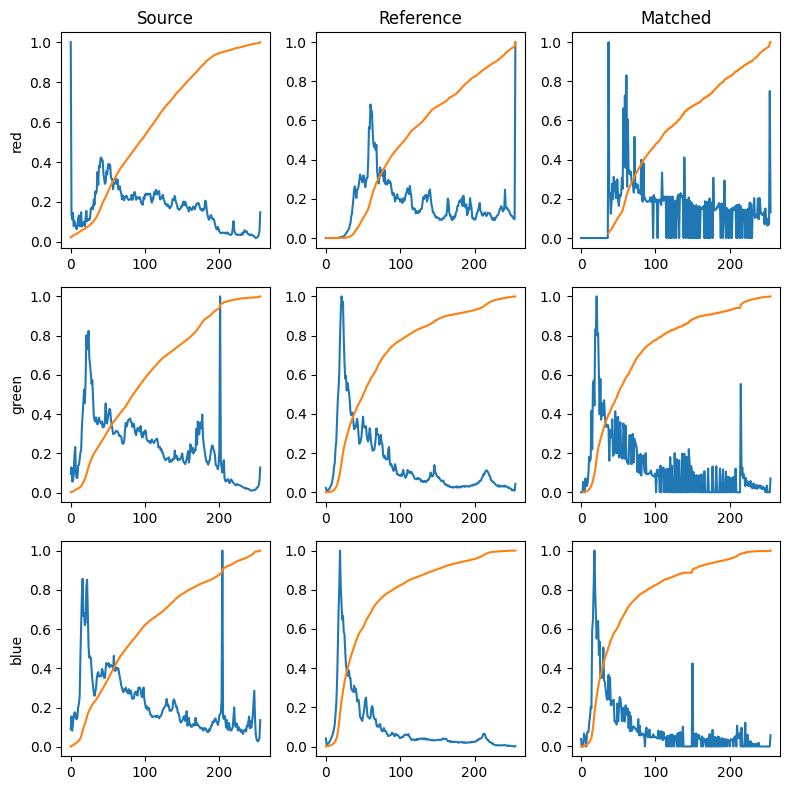

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((imgHmSrc, imgHmTar, imgHm3)):
	for c, c_color in enumerate(('red', 'green', 'blue')):
		img_hist, bins = exposure.histogram(img[..., c],
											source_range='dtype')
		axes[c, i].plot(bins, img_hist / img_hist.max())
		img_cdf, bins = exposure.cumulative_distribution(img[..., c])
		axes[c, i].plot(bins, img_cdf)
		axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

# Arithmetic Operations

In [27]:
def ArithmeticTransform(img, a, b):
    # img is the input image
    imgOut = a * img + b
    imgOut = np.clip(imgOut, 0, 255)
    imgOut = imgOut.astype(np.uint8)
    return imgOut

In [37]:
def pixelate(img, w, h):
    # Get input size
    height, width = img.shape[:2]

    # Resize input to "pixelated" size
    output = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

    return output

In [38]:
def ArithmeticTransform2(img1, img2 , operation):
    # img1 is the input image
    # img2 is the input image
    # operation is the operation to be performed
    img1 = pixelate(img1, 256, 256)
    img2 = pixelate(img2, 256, 256)
    if operation == 'and':
        imgOut = cv2.bitwise_and(img1, img2)
    elif operation == 'or':
        imgOut = cv2.bitwise_or(img1, img2)
    elif operation == 'xor':
        imgOut = cv2.bitwise_xor(img1, img2)
    elif operation == 'not':
        imgOut = cv2.bitwise_not(img1)
    imgOut = np.clip(imgOut, 0, 255)
    imgOut = imgOut.astype(np.uint8)
    return imgOut

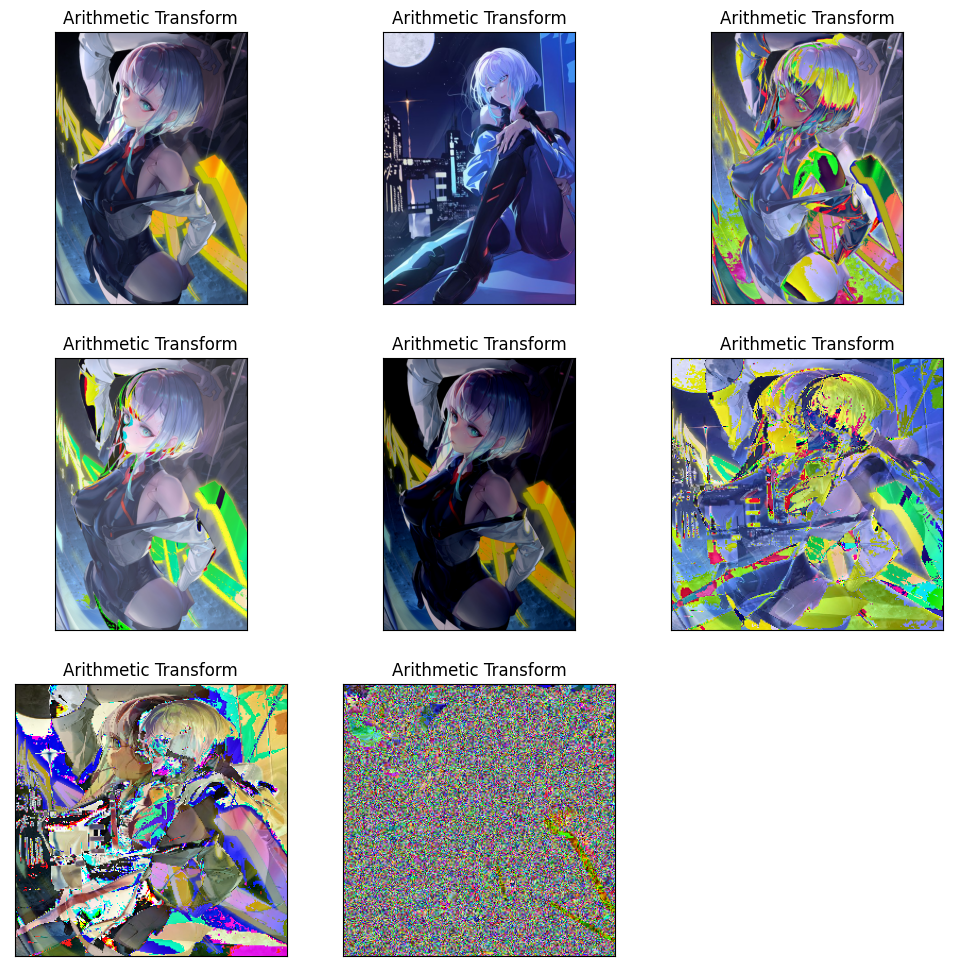

In [40]:
imgArithSrc = cv2.imread('../img/lucy6.jpg', cv2.IMREAD_UNCHANGED)
imgArithTar = cv2.imread('../img/lucy5.jpg', cv2.IMREAD_UNCHANGED)

imgArith1 = ArithmeticTransform(imgArithSrc, 2, 25)
imgArith2 = ArithmeticTransform(imgArithSrc, 1, 50)
imgArith3 = ArithmeticTransform(imgArithSrc, 1, -50)
imgArith4 = ArithmeticTransform2(imgArithSrc, imgArithTar, 'add')
imgArith5 = ArithmeticTransform2(imgArithSrc, imgArithTar, 'sub')
imgArith6 = ArithmeticTransform2(imgArithSrc, imgArithTar, 'mul')

plt.figure(figsize=(12, 12))
for i, img in enumerate((imgArithSrc, imgArithTar, imgArith1, imgArith2, imgArith3, imgArith4, imgArith5, imgArith6)):
    plt.subplot(3,3,i+1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Arithmetic Transform'), plt.xticks([]), plt.yticks([])
plt.show()